#### Task 1 - Web Scrapping

**Scrape data from the web**
The first thing to do will be to scrape review data from the web. For this, you should use a website called Skytrax.

**Analyse data**
You will need to perform data cleaning in order to prepare the data for analysis. When the data is clean, you should perform your own analysis to uncover some insights. As a starting point, you could look at topic modelling, sentiment analysis or wordclouds to provide some insight into the content of the reviews.

In [1]:
#import basic libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
import requests 
URL = "http://airlinequality.com/airline-reviews/british-airways"
r = requests.get(URL) 
print(r.content) 

b'<!doctype html>\n\n<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-GB"> <!--<![endif]-->\n\t<head>\n\t\t<meta charset="utf-8">\n\n\t\t<title>British Airways Customer Reviews - SKYTRAX</title>\n\n\t\t<!-- Google Chrome Frame for IE -->\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\n\t\t<!-- mobile meta -->\n\t\t<meta name="HandheldFriendly" content="True">\n\t\t<meta name="MobileOptimized" content="320">\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no"/>\n\t\t<!-- icons & favicons -->\n\t\t<link rel="apple-touch-icon" href="https://www.airlinequality.com/wp-c

In [3]:
soup = BeautifulSoup(r.content, "html.parser") 
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->
<!--[if gt IE 8]><!-->
<html lang="en-GB">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <title>
   British Airways Customer Reviews - SKYTRAX
  </title>
  <!-- Google Chrome Frame for IE -->
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <!-- mobile meta -->
  <meta content="True" name="HandheldFriendly"/>
  <meta content="320" name="MobileOptimized"/>
  <meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport">
   <!-- icons & favicons -->
   <link href="https://www.airlinequality.com/wp-content/themes/airlinequality2014new/library/images/apple-

In [4]:
parsed_content = soup.findAll('div', attrs = {"class": "text_content"}) 
for row in parsed_content:
    print(row.text)   

✅ Trip Verified |  Would happily fly them again. I had a personal emergency and was allowed to reschedule my flights free of charge. Onboard service on LHR-IST was no frills, but JFK-LHR was impeccable: good food, lots of movies/cds on the IFE, open bar service the entire flight. Friendly flight attendants always happy to provide an extra drink/snack.
Not Verified |  Flew premium, only worth the extra money for the bit of extra room. Penny pinching means there’s no other benefit - one drink service on 10 hour flight, no fizz offered before take off, poor food, boarding was badly organised. Food left on tables 30 min before landing with no tea and coffee offered. Few small cups of water passed around but nothing “premium” about this. New planes have been decorated terribly - feels like you’re in a dentist waiting room. Devoid of any personality or joy. Only fly if the only option, only fly premium if it’s not too expensive - seriously not worth much more than economy these days, especia

#### Looping through more number of pages..

In [5]:
URL = "http://airlinequality.com/airline-reviews/british-airways"
reviews_BA =[]
pages = 30
page_size = 100

for i in range(1,pages + 1):
    
    print(f'Scrapping - page {i}:')
    
    url = f"{URL}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    
    for s in soup.find_all('div', attrs = {"class": "text_content"}):
        reviews_BA.append(s.get_text())
    
    print(f'{len(reviews_BA)} total reviews')

Scrapping - page 1:
100 total reviews
Scrapping - page 2:
200 total reviews
Scrapping - page 3:
300 total reviews
Scrapping - page 4:
400 total reviews
Scrapping - page 5:
500 total reviews
Scrapping - page 6:
600 total reviews
Scrapping - page 7:
700 total reviews
Scrapping - page 8:
800 total reviews
Scrapping - page 9:
900 total reviews
Scrapping - page 10:
1000 total reviews
Scrapping - page 11:
1100 total reviews
Scrapping - page 12:
1200 total reviews
Scrapping - page 13:
1300 total reviews
Scrapping - page 14:
1400 total reviews
Scrapping - page 15:
1500 total reviews
Scrapping - page 16:
1600 total reviews
Scrapping - page 17:
1700 total reviews
Scrapping - page 18:
1800 total reviews
Scrapping - page 19:
1900 total reviews
Scrapping - page 20:
2000 total reviews
Scrapping - page 21:
2100 total reviews
Scrapping - page 22:
2200 total reviews
Scrapping - page 23:
2300 total reviews
Scrapping - page 24:
2400 total reviews
Scrapping - page 25:
2500 total reviews
Scrapping - page 2

In [6]:
df_reviews = pd.DataFrame(reviews_BA).rename(columns = {0:'Reviews'})
df_reviews.tail(4)

,Reviews
2996,"Travelled Club from MIA to LHR last week having made the outbound trip on a codeshare AA flight (which was excellent!) We paid an extra £170 to pre-book seats upstairs which was ridiculously expensive. It's been several years since I last tried BA Club on a transatlantic flight and I was frankly shocked at how bad the product has become. Compared to the Emirates business class I'd experienced from the far east just 6 weeks before BA are fast becoming the 'Lada' of the Airline business. The seats are no longer that comfortable with the window passenger having to step over the feet of the total stranger in the next row to get into the aisle. The entertainment? Really poor! But worst of all the food! I would have been disappointed to get rubbish like that served in Economy but when one has paid thousands of pounds for the privilege? The breakfast was a joke. A glass of orange juice accompanied by a few slices of fruit and melon and the offer of a tiny bacon roll! My wife had requested special vegetarian meals so when the bacon rolls came along the Cabin Crew first offered her one then said ""Oh sorry of course you're vegetarian!"" and that was it - no alternative! Never again BA!"
2997,Had a good BA flight out to Barcelona but found on return switched to Vueling. On this flight we had to pay for refreshments. I wrote in to BA to complain and had no reply. After several weeks I re-wrote and eventually received an apology but no explanation as to why we had to pay for food.
2998,LIS-LHR-VIE on Dec. 8 both legs on an Airbus 320 in Club Europe (Business Class) - both legs on time seats were Economy seats with the middle seat left unsold and featuring the new slim seats which are less comfortable and have a reduced seat pitch – Check-in in LIS was handled by rather surly agents which was untypical for an otherwise friendly airport but Business class waiting lines were very short so overall it was OK. LIS-LHR leg was with a rather lacklustre and inattentive European fleet crew after the initial service of food and drinks further service consisted of clearing the dishes and on board sales. Other than that Business class flight attendants were behind the curtain reading magazines chatting and rather attending to themselves than the passengers. At 11 am the Business Class food served was a plate cold cuts a roll and three thin slices of fruit (basically a make yourself sandwich on a plate). Extremely disappointing and poor for a lunch flight scheduled to arrive in Heathrow after 1 pm. On the LHR-VIE leg service was“afternoon tea”meaning again sandwiches. However this time at least it was more appropriate due to time of day. Full bar service on both flights and the French white wine served was ok. The mixed fleet crew on the second leg was more interested in its job and up to BA standards regarding friendliness and attentiveness. Transfer procedures in LHR Terminal 3 were fast and friendly even the extra security checks required for all transfers at LHR (even Intra-EU) were hassle free and easy. BA’s Galleries Lounge in LHR T3 was again an oasis of rest amid a busy airport; comfortable with excellent drink selection and decent food selection including several good warm choices such as various curries. In Lisbon Portela BA uses the shared Blue Lounge which is small and offerings are rather limited; some limited snacks ok drinks but at least good Nespresso coffee. Although small it was not crowded which is a plus. So BA delivered a good basic product for economy standards but I fail to see any real Business Class service offered here (not seat wise not meal wise not service wise). The only saving grace was the Galleries Lounge in Heathrow T3 and the better service on the LHR-VIE leg. Not recommended for Business Class within Europe based on this experience. (Oneworld Sapphire).
2999,LGW to TFS in Club Europe. Disappointing that BA has downgraded its CE service to such an extent that it is not really worth paying the extra for 

**Data preprocessing & cleaning**

*Data Cleaning:*

- Removing ✅ Verified Review |  from all the reviews
- Changing all the reviews into lowercase
- Apostrophe look up
- Short words
- Emoticons
- Replacing numbers and special characters with space
- Removing words whom length is 1
- Spelling Correction - With TextBlob Library

*Data preprocessing:*

- Tokenization
- Enrichment - POS Tagging
- Stopwords removal
- Stemming
- Lemmatizing

In [7]:
# Removing ✅ Verified Review | from all the reviews

df_reviews.Reviews = df_reviews.Reviews.str.split('|',expand=True)[1]
df_reviews.head(5)

,Reviews
0,"Would happily fly them again. I had a personal emergency and was allowed to reschedule my flights free of charge. Onboard service on LHR-IST was no frills, but JFK-LHR was impeccable: good food, lots of movies/cds on the IFE, open bar service the entire flight. Friendly flight attendants always happy to provide an extra drink/snack."
1,"Flew premium, only worth the extra money for the bit of extra room. Penny pinching means there’s no other benefit - one drink service on 10 hour flight, no fizz offered before take off, poor food, boarding was badly organised. Food left on tables 30 min before landing with no tea and coffee offered. Few small cups of water passed around but nothing “premium” about this. New planes have been decorated terribly - feels like you’re in a dentist waiting room. Devoid of any personality or joy. Only fly if the only option, only fly premium if it’s not too expensive - seriously not worth much more than economy these days, especially if you’re in the middle 4."
2,"First our morning flight was cancelled and moved to an afternoon flight, understanding sometimes these situations are unavoidable, however it lost us one day's experience in Cairo. We were quite upset when we got onto the plane and were squashed into regular seats, on both flights. As my husband had spasms, he had to stretch his legs across my lap, and not once did ANY of the attendants ask if we were okay as we were clearly struggling. As the service came to us for food, each choice we made we were told, they were all out and we had to settle for what they had left. I did the correct thing once home and sent in my complaints. They responded with a $100 pound voucher for our group."
3,"Although it was a bit uncomfortable flight in an economy, the flight attendants made the flight the best possibly could. Such a nice and professional crew. Very attentive and looking out for their customers."
4,"Boarding was decently organised. The A380 still has the rather strange configuration in Club World where you neighbour is sitting in the opposite position. The A380 was nearly full, rather poor amenity bag. The welcome drink was ok but then rather long waiting for the aperitive what is made in the pantry. The meal was ok but not great, aside the Champagne no European wines on this flight. Service was friendly but rather slow, no spontaneous refills of drinks offered. Acceptable continental style breakfast. Extremely narrow restrooms without any lotions or similar. It was an acceptable experience, nothing more. After landing 50 minutes waiting for luggage labelled as priority."


In [8]:
# Changing all the reviews into lowercase

df_reviews['Cleaned'] = df_reviews['Reviews'].str.lower()
df_reviews.head()

,Reviews,Cleaned
0,"Would happily fly them again. I had a personal emergency and was allowed to reschedule my flights free of charge. Onboard service on LHR-IST was no frills, but JFK-LHR was impeccable: good food, lots of movies/cds on the IFE, open bar service the entire flight. Friendly flight attendants always happy to provide an extra drink/snack.","would happily fly them again. i had a personal emergency and was allowed to reschedule my flights free of charge. onboard service on lhr-ist was no frills, but jfk-lhr was impeccable: good food, lots of movies/cds on the ife, open bar service the entire flight. friendly flight attendants always happy to provide an extra drink/snack."
1,"Flew premium, only worth the extra money for the bit of extra room. Penny pinching means there’s no other benefit - one drink service on 10 hour flight, no fizz offered before take off, poor food, boarding was badly organised. Food left on tables 30 min before landing with no tea and coffee offered. Few small cups of water passed around but nothing “premium” about this. New planes have been decorated terribly - feels like you’re in a dentist waiting room. Devoid of any personality or joy. Only fly if the only option, only fly premium if it’s not too expensive - seriously not worth much more than economy these days, especially if you’re in the middle 4.","flew premium, only worth the extra money for the bit of extra room. penny pinching means there’s no other benefit - one drink service on 10 hour flight, no fizz offered before take off, poor food, boarding was badly organised. food left on tables 30 min before landing with no tea and coffee offered. few small cups of water passed around but nothing “premium” about this. new planes have been decorated terribly - feels like you’re in a dentist waiting room. devoid of any personality or joy. only fly if the only option, only fly premium if it’s not too expensive - seriously not worth much more than economy these days, especially if you’re in the middle 4."
2,"First our morning flight was cancelled and moved to an afternoon flight, understanding sometimes these situations are unavoidable, however it lost us one day's experience in Cairo. We were quite upset when we got onto the plane and were squashed into regular seats, on both flights. As my husband had spasms, he had to stretch his legs across my lap, and not once did ANY of the attendants ask if we were okay as we were clearly struggling. As the service came to us for food, each choice we made we were told, they were all out and we had to settle for what they had left. I did the correct thing once home and sent in my complaints. They responded with a $100 pound voucher for our group.","first our morning flight was cancelled and moved to an afternoon flight, understanding sometimes these situations are unavoidable, however it lost us one day's experience in cairo. we were quite upset when we got onto the plane and were squashed into regular seats, on both flights. as my husband had spasms, he had to stretch his legs across my lap, and not once did any of the attendants ask if we were okay as we were clearly struggling. as the service came to us for food, each choice we made we were told, they were all out and we had to settle for what they had left. i did the correct thing once home and sent in my complaints. they responded with a $100 pound voucher for our group."
3,"Although it was a bit uncomfortable flight in an economy, the flight attendants made the flight the best possibly could. Such a nice and professional crew. Very attentive and looking out for their customers.","although it was a bit uncomfortable flight in an economy, the flight attendants made the flight the best possibly could. such a nice and professional crew. very attentive and looking out for their customers."
4,"Boarding was decently organised. The A380 still has the rather strange configuration in Club World where you neighbour is sitting in the opposite position. The A380 w

In [9]:
# Apostrophe Lookup

apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [10]:
def lookup_dict(text, dictionary):
    for word in str(text).split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [11]:
df_reviews['Cleaned'] = df_reviews['Cleaned'].apply(lambda x: lookup_dict(x,apostrophe_dict))
df_reviews.sample(2)

,Reviews,Cleaned
684,"I booked a flight from Bucharest to London and return and when we were at the airport, they informed us that the flight will be delayed for 5 hours (from 8am to 1pm), then another 1 hour and a half (until 2:30 pm). We lost the money we paid for the bus tickets and they would not refund. Returning to Bucharest our flight was delayed and they did not inform us about it. I understand that unforeseen situation can happen, but I have never seen such a poorly prepared company in my life.","i booked a flight from bucharest to london and return and when we were at the airport, they informed us that the flight will be delayed for 5 hours (from 8am to 1pm), then another 1 hour and a half (until 2:30 pm). we lost the money we paid for the bus tickets and they would not refund. returning to bucharest our flight was delayed and they did not inform us about it. i understand that unforeseen situation can happen, but i have never seen such a poorly prepared company in my life."
1709,None,None


In [12]:
# Short words

short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [13]:
df_reviews['Cleaned'] = df_reviews['Cleaned'].apply(lambda x: lookup_dict(x,short_word_dict))
df_reviews.sample(2)

,Reviews,Cleaned
614,"Lisbon to London. Business class is just economy class with an empty middle seat. No leg room for me. Meal service had no choice by the time they got halfway through business class. All that was left was cod. Freezing cold, but no blankets. Poor staff spent most of the flight apologising. Never fly British Airways.","lisbon to london. business class is just economy class with an empty middle seat. no leg room for me. meal service had no choice by the time they got halfway through business class. all that was left was cod. freezing cold, but no blankets. poor staff spent most of the flight apologising. never fly british airways."
1142,"Vancouver to Edinburgh via London was the worst travel experience I have had. I was travelling with 2 seniors (+85 & +70) we requested assistance and nobody showed up at any of the gates neither departing nor arriving. We actually had to beg for help. The distance between gates is far and too much walking for seniors. In our way from London to Edinburgh it was a nightmare. The flight was delayed and we got to London about an hour late, on top of that we asked for assistance to take the 2 seniors to the next gate and no one seemed to care. The 2 seniors had to walk all that way. It was not only the walking, it was the rush they had, as we had to go trough immigration and the next flight was living in less than 1:30 hours. On our way back from Inverness to Canada another nightmare despite we requested assistance in advance. Once again there was nobody waiting for the seniors at the gate. Again we had to beg for assistance and the British Airways staff did not seem to know or care about this. They said that they called the buggy and that was all. We said that we were going to miss the airplane as the gates/ terminal distance were far and no one seemed to care at all. We were lucky I asked a gentleman who was driving one of the buggy and passed by and he kindly accept to take the seniors to take the bus area from terminal 5 to 3 (in London) and then arranged for them to be picked up in terminal 3 and after security point. This gentleman who is not British Airways employee provided a great service. Summarizing the only good experience we had was with an external person that just by chance I asked and he decided to help us out. Seats were another problem. We did the online check in (24 before) and we had the seats already chosen 12D for one senior (isle) and 18D (isle) for the other senior. When we got to the counter in Inverness Airport the agent told us there were not seat chose even though we had prove and the boarding who was sent by email showing the seats. Then the agent put the seniors almost at the end of the airplane and in the middle seats. So once again, more walking for them, problems to get in/out the seats, and of course problem to get to the washroom. - luggage another problem! British Airways in Inverness said that the luggage goes directly to Victoria and that we did not have to pick it up in Vancouver. Surprise surprise! We went through customs and when we got to Westjet counter for the connection to Victoria they asked for the luggage. They said we had to pick it up before going through customs. There was no way to go back to the carousel, so we had to wait for the Westjet staff to contact somebody from British Airways to get us to the carrusel and take the luggage. So nightmare again!! And another rush to us to get to the next fligh. According to Westhet agents they said that British airways should have had the assistance for the seniors and of course pick the luggage with them and bring it to the connection. What can you expect from British Airways? If It doesn’t even care about the passengers that are seniors and requested assistance. We can only thank Westjet staff who provide the assistance in Vancouver.","vancouver to edinburgh via london was the worst travel experience i have had. i was travelling with 2 seniors (+85 & +70) we requested assistance and nob

In [14]:
# Emoticons

emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

In [15]:
df_reviews['Cleaned'] = df_reviews['Cleaned'].apply(lambda x: lookup_dict(x,emoticon_dict))
df_reviews.sample(2)

,Reviews,Cleaned
1050,"Beijing to London. Service at the British Airways business class counter at Beijing airport was pleasant. The business lounge was quiet when we were there, however, food options were very limited, we were there in the morning, the food options for breakfast were hot meals or some plain toast or a couple of sandwich options. Onboard, service was really good, quite personal and attentive, which made a difference from the service on the way out to Beijing. Food was as good a you'd expect to get on board, I managed to get a window seat, which made a difference with regards to being able to sleep on board. Entertainment options were good.","beijing to london. service at the british airways business class counter at beijing airport was pleasant. the business lounge was quiet when we were there, however, food options were very limited, we were there in the morning, the food options for breakfast were hot meals or some plain toast or a couple of sandwich options. onboard, service was really good, quite personal and attentive, which made a difference from the service on the way out to beijing. food was as good a you had / you would expect to get on board, i managed to get a window seat, which made a difference with regards to being able to sleep on board. entertainment options were good."
9,"Check in was so slow, no self check in and bag drop. Boarding was ok, flight totally full. Booked row 9 which was ok. Some space in overhead bins. Seat and legroom ok. Cabin crew ok, smiled, gave out the bottle of water and pretzels. Flight itself was ok, landed 25 mins early and then waited 30 minutes for a stand and ground crew. Bags came off reasonably quickly. BA still seems to believe it is something special, a premium carrier. The reality is that it is not. The only reason we flew BA was we got virtually free tickets because both flights were cancelled last year. BA is our carrier of last choice.","check in was so slow, no self check in and bag drop. boarding was ok, flight totally full. booked row 9 which was ok. some space in overhead bins. seat and legroom ok. cabin crew ok, smiled, gave out the bottle of water and pretzels. flight itself was ok, landed 25 mins early and then waited 30 minutes for a stand and ground crew. bags came off reasonably quickly. ba still seems to believe it is something special, a premium carrier. the reality is that it is not. the only reason we flew ba was we got virtually free tickets because both flights were cancelled last year. ba is our carrier of last choice."


In [16]:
# Replacing Special Characters with space

import re 

def remove_specialChar(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df_reviews['Cleaned'] = df_reviews['Cleaned'].apply(remove_specialChar)
df_reviews.sample(2)

,Reviews,Cleaned
1432,"On this route from Amsterdam to Tokyo Haneda via London Heathrow we had the expected service onboard. The first flight was slightly delayed, but our transfer time was more then 3 hours, so that didn't cost any problem. The cabin crew did their best to statisfy every passenger at the flight to HND. When we got our luggage we discovered that one of the suitcases was damaged. At HND Japan Airlines is the agent for British airways and as it cost time to explain everything. Their service was great. They filed a report to BA and when we are back from the journey we should contact BA to claim the damage. We did and within a few days we got a really extensive response and were compensated. Despite this damaged suitcase it was handled great. That's what made the difference to me.",on this route from amsterdam to tokyo haneda via london heathrow we had the expected service onboard the first flight was slightly delayed but our transfer time was more then hours so that did not cost any problem the cabin crew did their best to statisfy every passenger at the flight to hnd when we got our luggage we discovered that one of the suitcases was damaged at hnd japan airlines is the agent for british airways and as it cost time to explain everything their service was great they filed a report to ba and when we are back from the journey we should contact ba to claim the damage we did and within a few days we got a really extensive response and were compensated despite this damaged suitcase it was handled great that has that is what made the difference to me
2517,None,None


In [17]:
# Removing words whom length is 1

df_reviews['Cleaned'] = df_reviews['Cleaned'].apply(lambda x: ' '.join([w for w in str(x).split() if len(w)>1]))
df_reviews.sample(2)

,Reviews,Cleaned
1898,"No online check in is available from Dubrovnik so everyone checks in at the airport. Lounge in Dubrovnik is OK but refreshments poor, but better than being in the busy main departures area. The in bound flight was late and we were therefore late departing. No priority boarding. Cabin again not very clean probably because they were trying to minimise the delay! No newspapers available, when there are only 4 rows in business you would thing BA could provide them in the premium cabin. So called 'Brunch' was served, which was a few sad looking pieces of ham and cheese with a tomato, lettuce leaf and cucumber. Very poor for what is scheduled as just under a 3 hour flight. This to me is cost cutting too far and not sure how BA expect to hold onto premium passengers who are paying a lot of money for their tickets. Cabin crew did nothing to stop economy passengers coming through to use the toilet in business, is it that difficult? Very poor show and think we will look at alternatives next time!",no online check in is available from dubrovnik so everyone checks in at the airport lounge in dubrovnik is ok but refreshments poor but better than being in the busy main departures area the in bound flight was late and we were therefore late departing no priority boarding cabin again not very clean probably because they were trying to minimise the delay no newspapers available when there are only rows in business you would thing ba could provide them in the premium cabin so called brunch was served which was few sad looking pieces of ham and cheese with tomato lettuce leaf and cucumber very poor for what is scheduled as just under hour flight this to me is cost cutting too far and not sure how ba expect to hold onto premium passengers who are paying lot of money for their tickets cabin crew did nothing to stop economy passengers coming through to use the toilet in business is it that difficult very poor show and think we will look at alternatives next time
1381,"London Heathrow to Edinburgh return, possibly my last BA flights. I used economy (or maybe should be re named) economy minus outbound and returned in Club Europe, checked in online however 4 of the 5 checking in kiosks were not working at T5 so in the end collected the boarding pass from the desk. Security quick I'm a BA/Oneworld sapphire member so used the North lounge which was okay. Flight boarded on time but departed 15 min late and arrived 15 min late. A320, seat 11A an exit seat was fine however no service at all on board. Return check in quick as was security, the BA lounge in EDI has been the same for a few years now. It's at least quiet with nice staff and pleasant staff. Boarding through gate 20 on to a pretty old 767 departed 30 min late. Club Europe on domestic flights is a new introduction. Actually it replaced what was BA economy class. A cynical ploy by the BA board to extract more money out of its loyal customers? The aircraft was pretty full so some people like BA although I suspect many passengers were transferring at LHR. Service was okay food economy standard although included in the price. Arrival at T5 around 30 min late 10 min for bags. I fly between 20 & 30 times each year 90% on long haul flights. I have supported BA in the past although I've not used them long haul for about 17 months. Basically they are not good enough. Cut backs and poor service is evident. I expect security comfort and some service when paying £2500+ for a business class ticket. Qatar, Cathay and even SriLankan offer better service. On reflection I fly business class on most flights so I don't actually need any frequent flyer status. The cost of loyalty outweighs the benefits. I might fly BA in future as a very last resort or to use up the miles I've earned. But my loyalty will be my wallet in future. Bye BA.",london heathrow to edinburgh return possibly my last ba flights used economy or maybe should be re named economy minus outbound and returned in club europe che

In [18]:
# Spelling correction is a cool feature which TextBlob offers

from textblob import TextBlob

text = df_reviews['Cleaned'][0:10].apply(lambda x: str(TextBlob(x).correct()))
text

0    would happily fly them again had personal emer...
1    flew premium only worth the extra money for th...
2    first our morning flight was canceled and move...
3    although it was bit uncomfortable flight in an...
4    boarding was decently organised the still has ...
5    boarding on time and departure on time for fli...
6    my original flight was canceled just over week...
7    delayed just for change poor communication bri...
8    very competent check in staff saw had problem ...
9    check in was so slow no self check in and bag ...
Name: Cleaned, dtype: object

#### Data Preprocessing

In [19]:
# Tokenization and stop words

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [20]:
df_reviews['review_token'] = df_reviews['Cleaned'].apply(lambda x: word_tokenize(x))
df_reviews.sample(2)

,Reviews,Cleaned,review_token
2441,None,None,[None]
921,"Gatwick to Faro. Club check in at Gatwick is very quick and easy, and fastrack security is also very efficient and we were quickly through to the club lounge. The lounge itself is really nice, spacious enough to have plenty of seating available, and different types of seating, but it also feels very cosy and welcoming. The lounge was clean and tidy and there were pretty good food options available.. including some lovely scones with clotted cream and jam. As always the drinks offering in BA lounges was great. The new boarding by group seems to be working quite well and BA staff are finally enforcing the priority system.. long may it continue! On board was the usual club Europe offering.. which while not exactly luxury is standard for Europe now and for a 3 hour flight is fine. BA don’t ever seem to offer a welcome drink on short haul flights which was a shame as there is plenty of time after the initial boarding rush is complete, there was also no personal welcome or greeting of any kind.. it’s a quick and simple gesture that should be done on any decent carrier. I would also like to see menus handed out before take off, which could be done at the same time as a welcome. The food and drink offering on board is reasonable although food was typically over cooked and with sloppy presentation. Overall a decent enough flight and for a reasonable price, but a few small touches would make it feel much better.",gatwick to faro club check in at gatwick is very quick and easy and fastrack security is also very efficient and we were quickly through to the club lounge the lounge itself is really nice spacious enough to have plenty of seating available and different types of seating but it also feels very cosy and welcoming the lounge was clean and tidy and there were pretty good food options available including some lovely scones with clotted cream and jam as always the drinks offering in ba lounges was great the new boarding by group seems to be working quite well and ba staff are finally enforcing the priority system long may it continue on board was the usual club europe offering which while not exactly luxury is standard for europe now and for hour flight is fine ba don ever seem to offer welcome drink on short haul flights which was shame as there is plenty of time after the initial boarding rush is complete there was also no personal welcome or greeting of any kind it quick and simple gesture that should be done on any decent carrier would also like to see menus handed out before take off which could be done at the same time as welcome the food and drink offering on board is reasonable although food was typically over cooked and with sloppy presentation overall decent enough flight and for reasonable price but few small touches would make it feel much better,"[gatwick, to, faro, club, check, in, at, gatwick, is, very, quick, and, easy, and, fastrack, security, is, also, very, efficient, and, we, were, quickly, through, to, the, club, lounge, the, lounge, itself, is, really, nice, spacious, enough, to, have, plenty, of, seating, available, and, different, types, of, seating, but, it, also, feels, very, cosy, and, welcoming, the, lounge, was, clean, and, tidy, and, there, were, pretty, good, food, options, available, including, some, lovely, scones, with, clotted, cream, and, jam, as, always, the, drinks, offering, in, ba, lounges, was, great, the, new, boarding, by, group, seems, to, be, working, quite, well, ...]"


In [21]:
stop_words = set(stopwords.words('english'))

In [22]:
# Created new columns of tokens - where stop words are being removed
df_reviews['review_token_filtered'] = df_reviews['review_token'].apply(lambda x: [word for word in x if not word in stop_words])

## Tokens columns with stop words and without stop words
df_reviews[['review_token', 'review_token_filtered']].sample(2)

,review_token,review_token_filtered
2530,[None],[None]
1963,"[we, travelled, from, aberdeen, to, heathrow, and, on, to, san, francisco, with, no, issues, other, than, very, poor, legroom, even, less, legroom, than, on, local, flight, to, europe, ryanair, on, hour, flight, on, the, return, journey, the, first, flight, from, san, francisco, to, heathrow, was, delayed, once, on, the, plane, the, flight, was, ready, to, go, when, there, was, further, delay, because, the, gate, staff, had, somehow, mixed, up, the, boarding, passes, and, had, discrepancy, so, they, had, to, physically, check, several, passengers, to, make, sure, they, were, who, they, said, they, were, very, scary, in, view, of, the, security, ...]","[travelled, aberdeen, heathrow, san, francisco, issues, poor, legroom, even, less, legroom, local, flight, europe, ryanair, hour, flight, return, journey, first, flight, san, francisco, heathrow, delayed, plane, flight, ready, go, delay, gate, staff, somehow, mixed, boarding, passes, discrepancy, physically, check, several, passengers, make, sure, said, scary, view, security, situation, row, seats, flight, entertainment, row, first, flight, attendant, talked, fobbed, us, ages, eventually, admitted, could, fix, next, level, flight, attendant, tried, finally, flight, director, came, see, us, offered, us, alcoholic, drink, travelled, hours, entertainment, landing, heathrow, next, flight, aberdeen, also, delayed, one, hour, complaining, ba, eventually, replied, offering, us, voucher, pounds, much, ...]"


In [23]:
# Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach

from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [24]:
# Created one more columns review_stemmed 
df_reviews['review_stemmed'] = df_reviews['review_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
df_reviews['review_stemmed'].head(2)

0    would happili fli person emerg allow reschedul...
1    flew premium worth extra money bit extra room ...
Name: review_stemmed, dtype: object

In [25]:
#Lemmatization - Lemmatization is the process of converting a word to its base form

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

In [26]:
df_reviews['review_lemmatized'] = df_reviews['review_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
df_reviews['review_lemmatized'].sample(2)

1869    san jose london heathrow san jose september pr...
1863    previous review week ago specifically british ...
Name: review_lemmatized, dtype: object

In [27]:
df_reviews.head()

,Reviews,Cleaned,review_token,review_token_filtered,review_stemmed,review_lemmatized
0,"Would happily fly them again. I had a personal emergency and was allowed to reschedule my flights free of charge. Onboard service on LHR-IST was no frills, but JFK-LHR was impeccable: good food, lots of movies/cds on the IFE, open bar service the entire flight. Friendly flight attendants always happy to provide an extra drink/snack.",would happily fly them again had personal emergency and was allowed to reschedule my flights free of charge onboard service on lhr ist was no frills but jfk lhr was impeccable good food lots of movies cds on the ife open bar service the entire flight friendly flight attendants always happy to provide an extra drink snack,"[would, happily, fly, them, again, had, personal, emergency, and, was, allowed, to, reschedule, my, flights, free, of, charge, onboard, service, on, lhr, ist, was, no, frills, but, jfk, lhr, was, impeccable, good, food, lots, of, movies, cds, on, the, ife, open, bar, service, the, entire, flight, friendly, flight, attendants, always, happy, to, provide, an, extra, drink, snack]","[would, happily, fly, personal, emergency, allowed, reschedule, flights, free, charge, onboard, service, lhr, ist, frills, jfk, lhr, impeccable, good, food, lots, movies, cds, ife, open, bar, service, entire, flight, friendly, flight, attendants, always, happy, provide, extra, drink, snack]",would happili fli person emerg allow reschedul flight free charg onboard servic lhr ist frill jfk lhr impecc good food lot movi cd ife open bar servic entir flight friendli flight attend alway happi provid extra drink snack,would happily fly personal emergency allowed reschedule flight free charge onboard service lhr ist frill jfk lhr impeccable good food lot movie cd ife open bar service entire flight friendly flight attendant always happy provide extra drink snack
1,"Flew premium, only worth the extra money for the bit of extra room. Penny pinching means there’s no other benefit - one drink service on 10 hour flight, no fizz offered before take off, poor food, boarding was badly organised. Food left on tables 30 min before landing with no tea and coffee offered. Few small cups of water passed around but nothing “premium” about this. New planes have been decorated terribly - feels like you’re in a dentist waiting room. Devoid of any personality or joy. Only fly if the only option, only fly premium if it’s not too expensive - seriously not worth much more than economy these days, especially if you’re in the middle 4.",flew premium only worth the extra money for the bit of extra room penny pinching means there no other benefit one drink service on hour flight no fizz offered before take off poor food boarding was badly organised food left on tables min before landing with no tea and coffee offered few small cups of water passed around but nothing premium about this new planes have been decorated terribly feels like you re in dentist waiting room devoid of any personality or joy only fly if the only option only fly premium if it not too expensive seriously not worth much more than economy these days especially if you re in the middle,"[flew, premium, only, worth, the, extra, money, for, the, bit, of, extra, room, penny, pinching, means, there, no, other, benefit, one, drink, service, on, hour, flight, no, fizz, offered, before, take, off, poor, food, boarding, was, badly, organised, food, left, on, tables, min, before, landing, with, no, tea, and, coffee, offered, few, small, cups, of, water, passed, around, but, nothing, premium, about, this, new, planes, have, been, decorated, terribly, feels, like, you, re, in, dentist, waiting, room, devoid, of, any, personality, or, joy, only, fly, if, the, only, option, only, fly, premium, if, it, not, too, expensive, seriously, not, worth, ...]","[flew, premium, worth, extra, money, bit, extra, room, penny, pinching, means, benefit, one, drink, service, hour, flight, fizz, offered, take, poor

#### Sentiment Analysis with TextBlob

In [28]:
sentence = df_reviews['review_lemmatized']
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [29]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
df_textblob.head()

,Sentence,Polarity,Subjectivity
0,would happily fly personal emergency allowed reschedule flight free charge onboard service lhr ist frill jfk lhr impeccable good food lot movie cd ife open bar service entire flight friendly flight attendant always happy provide extra drink snack,0.365909,0.588636
1,flew premium worth extra money bit extra room penny pinching mean benefit one drink service hour flight fizz offered take poor food boarding badly organised food left table min landing tea coffee offered small cup water passed around nothing premium new plane decorated terribly feel like dentist waiting room devoid personality joy fly option fly premium expensive seriously worth much economy day especially middle,0.004104,0.406040
2,first morning flight cancelled moved afternoon flight understanding sometimes situation unavoidable however lost u one day experience cairo quite upset got onto plane squashed regular seat flight husband spasm stretch leg across lap attendant ask okay clearly struggling service came u food choice made told settle left correct thing home sent complaint responded pound voucher group,0.107143,0.270513
3,although bit uncomfortable flight economy flight attendant made flight best possibly could nice professional crew attentive looking customer,0.257143,0.671429
4,boarding decently organised still rather strange configuration club world neighbour sitting opposite position nearly full rather poor amenity bag welcome drink ok rather long waiting aperitive made pantry meal ok great aside champagne european wine flight service friendly rather slow spontaneous refill drink offered acceptable continental style breakfast extremely narrow restroom without lotion similar acceptable experience nothing landing minute waiting luggage labelled priority,0.193229,0.476042


In [30]:
# lets define a function to analyse

def text_blob_sentiment(x):
    if x < 0:
        return 'Negative'
    elif x == 0 :
        return 'Neutral'
    else:
        return 'Positive'
    
df_textblob['Textblob_Analysis'] = df_textblob['Polarity'].apply(text_blob_sentiment)
df_textblob.head()

,Sentence,Polarity,Subjectivity,Textblob_Analysis
0,would happily fly personal emergency allowed reschedule flight free charge onboard service lhr ist frill jfk lhr impeccable good food lot movie cd ife open bar service entire flight friendly flight attendant always happy provide extra drink snack,0.365909,0.588636,Positive
1,flew premium worth extra money bit extra room penny pinching mean benefit one drink service hour flight fizz offered take poor food boarding badly organised food left table min landing tea coffee offered small cup water passed around nothing premium new plane decorated terribly feel like dentist waiting room devoid personality joy fly option fly premium expensive seriously worth much economy day especially middle,0.004104,0.406040,Positive
2,first morning flight cancelled moved afternoon flight understanding sometimes situation unavoidable however lost u one day experience cairo quite upset got onto plane squashed regular seat flight husband spasm stretch leg across lap attendant ask okay clearly struggling service came u food choice made told settle left correct thing home sent complaint responded pound voucher group,0.107143,0.270513,Positive
3,although bit uncomfortable flight economy flight attendant made flight best possibly could nice professional crew attentive looking customer,0.257143,0.671429,Positive
4,boarding decently organised still rather strange configuration club world neighbour sitting opposite position nearly full rather poor amenity bag welcome drink ok rather long waiting aperitive made pantry meal ok great aside champagne european wine flight service friendly rather slow spontaneous refill drink offered acceptable continental style breakfast extremely narrow restroom without lotion similar acceptable experience nothing landing minute waiting luggage labelled priority,0.193229,0.476042,Positive


In [31]:
df_textblob['Textblob_Analysis'].value_counts()

Positive    1341
Neutral     1057
Negative     602
Name: Textblob_Analysis, dtype: int64

Text(0.5, 1.0, 'Percentage of each sentiment')

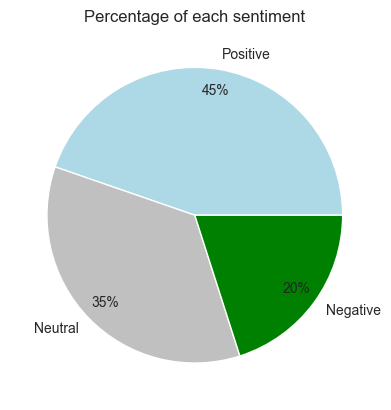

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# colors
colors = ['lightblue','silver','green']
#explosion
explode = (0.05,0.05,0.05)

plt.pie(df_textblob['Textblob_Analysis'].value_counts(),labels=df_textblob['Textblob_Analysis'].value_counts().index,autopct='%.0f%%', 
        pctdistance=0.85, colors=colors)
plt.title("Percentage of each sentiment", fontsize=12)


In [33]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sentence           3000 non-null   object 
 1   Polarity           3000 non-null   float64
 2   Subjectivity       3000 non-null   float64
 3   Textblob_Analysis  3000 non-null   object 
dtypes: float64(2), object(2)
memory usage: 93.9+ KB


<AxesSubplot:xlabel='Subjectivity', ylabel='Count'>

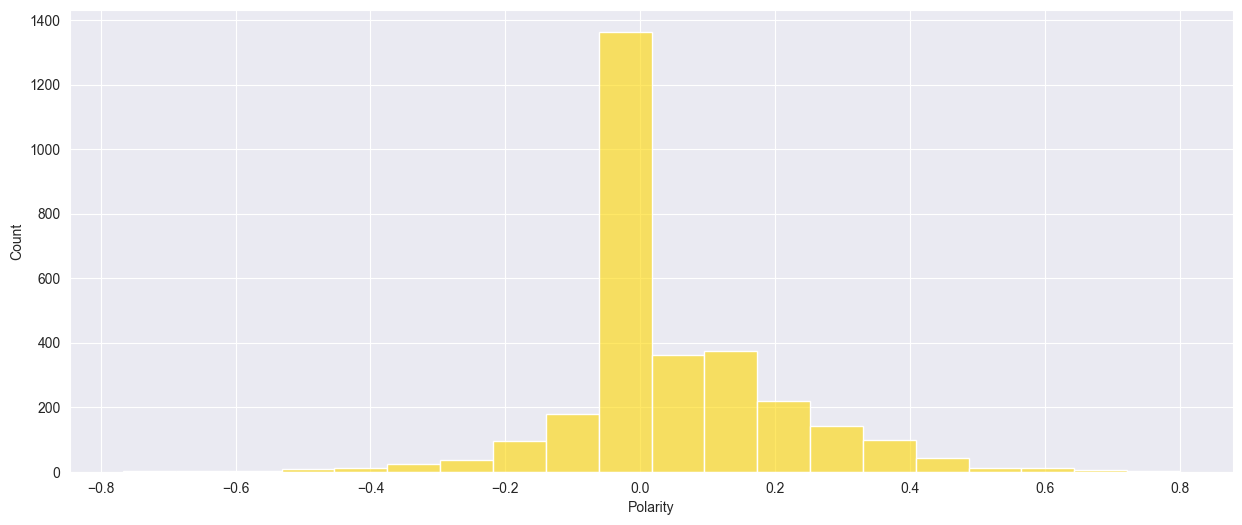

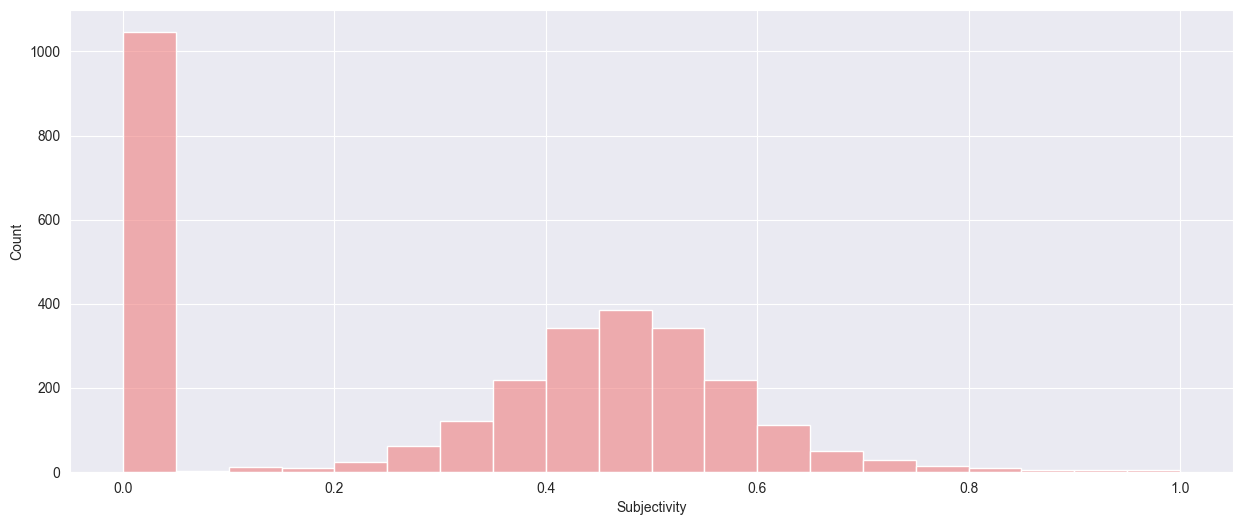

In [86]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = ( 15 ,6 ))
sns.histplot(df_textblob["Polarity"],color = 'gold', bins=20, alpha=0.6)

fig, ax = plt.subplots(figsize = ( 15 ,6 ))
sns.histplot(df_textblob["Subjectivity"],color = 'lightcoral', bins=20, alpha=0.6)



In [88]:
df_textblob.head()

,Sentence,Polarity,Subjectivity,Textblob_Analysis
0,would happily fly personal emergency allowed reschedule flight free charge onboard service lhr ist frill jfk lhr impeccable good food lot movie cd ife open bar service entire flight friendly flight attendant always happy provide extra drink snack,0.365909,0.588636,Positive
1,flew premium worth extra money bit extra room penny pinching mean benefit one drink service hour flight fizz offered take poor food boarding badly organised food left table min landing tea coffee offered small cup water passed around nothing premium new plane decorated terribly feel like dentist waiting room devoid personality joy fly option fly premium expensive seriously worth much economy day especially middle,0.004104,0.406040,Positive
2,first morning flight cancelled moved afternoon flight understanding sometimes situation unavoidable however lost u one day experience cairo quite upset got onto plane squashed regular seat flight husband spasm stretch leg across lap attendant ask okay clearly struggling service came u food choice made told settle left correct thing home sent complaint responded pound voucher group,0.107143,0.270513,Positive
3,although bit uncomfortable flight economy flight attendant made flight best possibly could nice professional crew attentive looking customer,0.257143,0.671429,Positive
4,boarding decently organised still rather strange configuration club world neighbour sitting opposite position nearly full rather poor amenity bag welcome drink ok rather long waiting aperitive made pantry meal ok great aside champagne european wine flight service friendly rather slow spontaneous refill drink offered acceptable continental style breakfast extremely narrow restroom without lotion similar acceptable experience nothing landing minute waiting luggage labelled priority,0.193229,0.476042,Positive


In [125]:
df_pos = df_textblob.loc[df_textblob.Polarity > 0]
df_neg = df_textblob.loc[df_textblob.Polarity < 0]
df_neu = df_textblob.loc[df_textblob.Polarity == 0]

In [120]:
import warnings
warnings.filterwarnings("ignore")

df_pos['text_length'] = df_pos['Sentence'].apply(len)
df_neg['text_length'] = df_neg['Sentence'].apply(len)

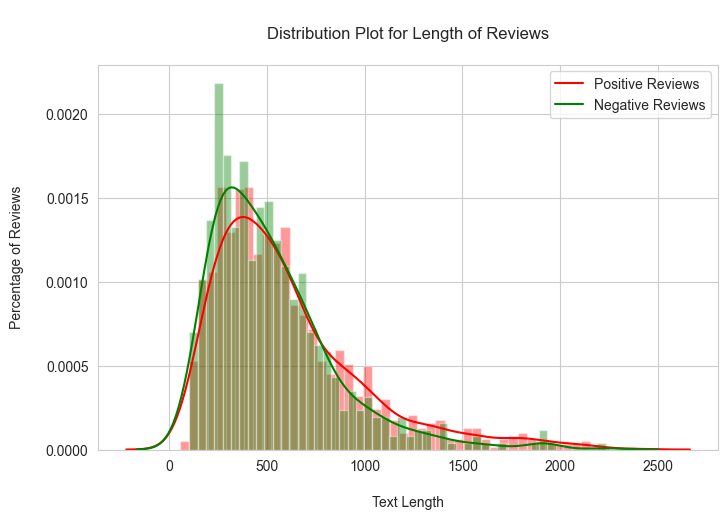

In [123]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(df_pos['text_length'], kde=True, bins=50, color='red')
sns.distplot(df_neg['text_length'], kde=True, bins=50, color='green')

plt.title('\nDistribution Plot for Length of Reviews\n')
plt.legend(['Positive Reviews', 'Negative Reviews'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Reviews\n');
plt.savefig('Distribution Plot for Length of Reviews.png')

(-0.5, 2999.5, 1999.5, -0.5)

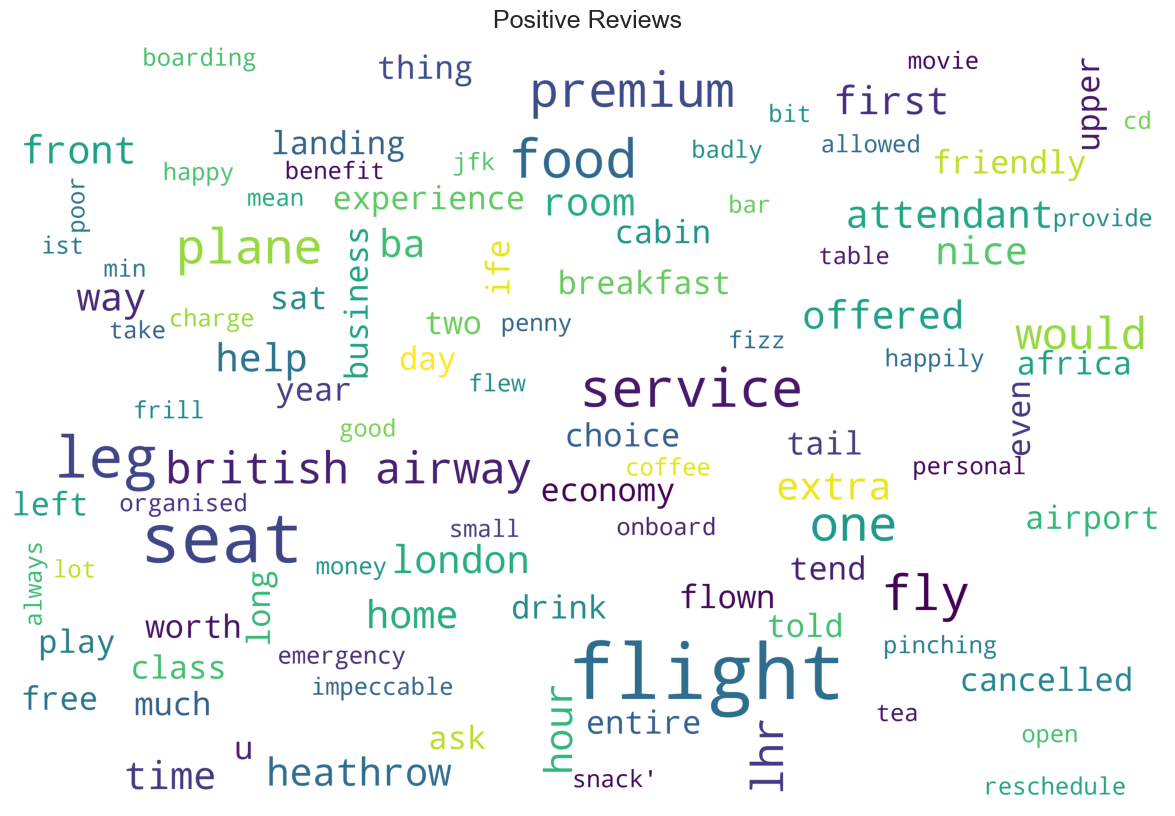

In [149]:
from nltk.corpus import stopwords

plt.subplots(figsize=(20,10))
wordcloud = WordCloud(max_font_size=200, max_words=100, background_color="white",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_pos.Sentence.values))

plt.imshow(wordcloud)
plt.title('Positive Reviews', fontsize=18)
plt.axis('off')

(-0.5, 2999.5, 1999.5, -0.5)

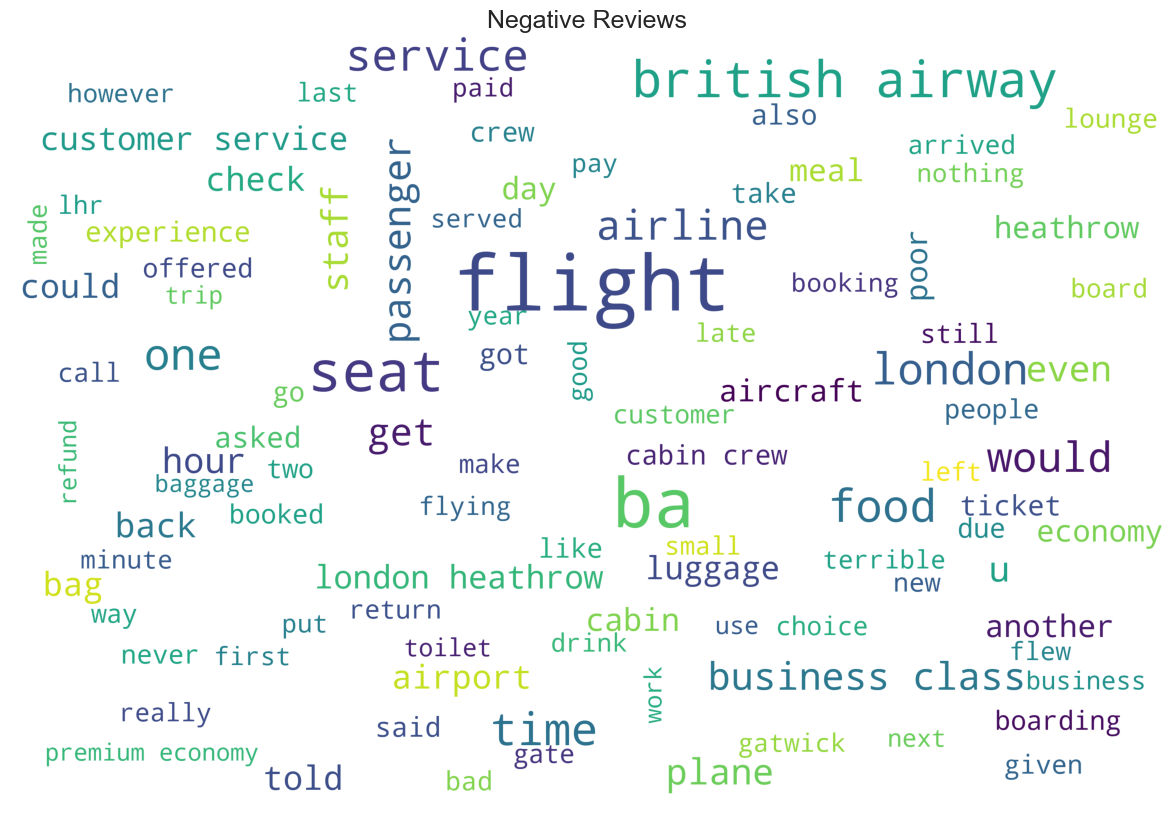

In [150]:
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(max_font_size=200, max_words=100, background_color="white",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_neg.Sentence.values))

plt.imshow(wordcloud)
plt.title('Negative Reviews', fontsize=18)
plt.axis('off')

### Wordclouds

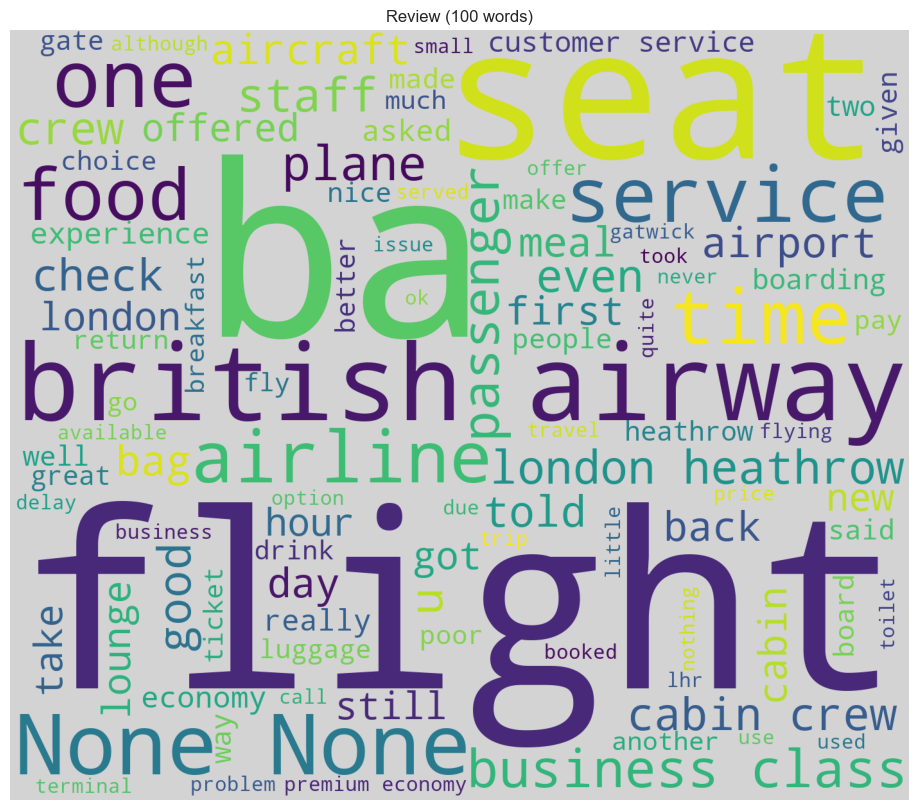

In [87]:
res=' '.join([i for i in df_reviews.review_lemmatized if not i.isdigit()])

plt.subplots(figsize=(20,10))
wordcloud = WordCloud(
                          background_color='lightgrey',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('Review (100 words)')
plt.axis('off')
plt.show()

#### Frequency Distribution

In [127]:
# importing libraries

from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

In [130]:
#only corpus of POSITIVE comments

pos_comments = df_pos['Sentence'].tolist()
neg_comments = df_neg['Sentence'].tolist()

In [131]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(neg_comments)
docs
features = vectorizer.get_feature_names()

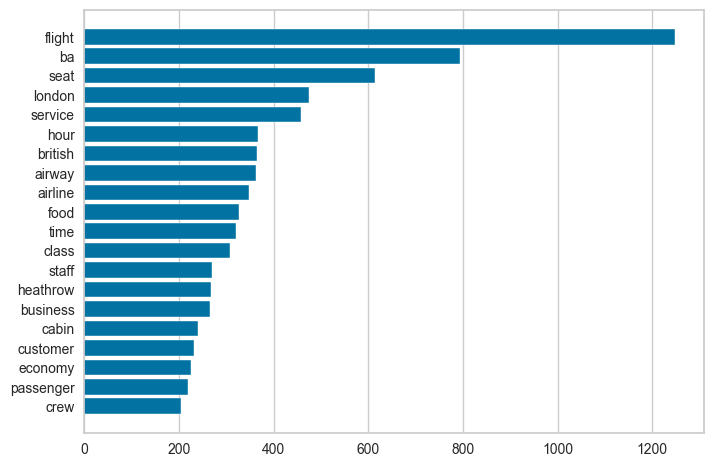

In [132]:
visualizer = FreqDistVisualizer(features=features, n=20)
visualizer.fit(docs)
visualizer.poof
plt.savefig('Freq_word_reviews.png')

In [135]:
docs_pos = vectorizer.fit_transform(pos_comments)
docs_pos
features = vectorizer.get_feature_names()

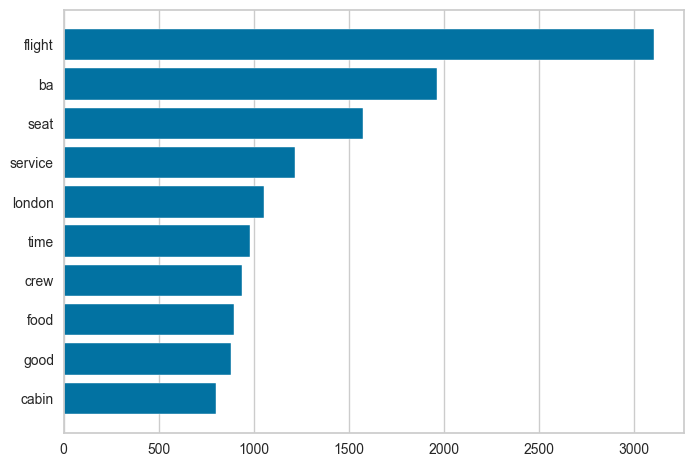

In [137]:
visualizer = FreqDistVisualizer(features=features, n=10)
visualizer.fit(docs_pos)
visualizer.poof
plt.savefig('Freq_word_reviews.png')